# Sasonal Time Series

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
#from sklearn.metrics import mean_squared_error

In [2]:
import pmdarima as pm
from statsmodels.tsa.api import ExponentialSmoothing

In [ ]:
import statsmodels.api as sm

In [3]:
import statsmodels.tsa.api as tsa

In [68]:
import statsmodels.tools as tools

In [4]:
nome_arq = 'Dados de Emprego_IA.xlsx'

In [57]:
dfi = pd.read_excel(nome_arq)
dfi.head(3)

,Mês,Comercio,Alimento,Metalurgia
0,2003-01-01,322,53.5,44.2
1,2003-02-01,317,53.0,44.3
2,2003-03-01,319,53.2,44.4


In [58]:
df = dfi[['Mês', 'Comercio', 'Alimento']].copy()
df.shape

(60, 3)

In [59]:
df.rename(columns= {'Mês': 'mes', 'Comercio': 'comercio', 'Alimento': 'alimento'}, inplace=True)
df.index = pd.to_datetime(df.mes, format='%Y-%m-%d')
df.tail(6)

,mes,comercio,alimento
mes,,,
2007-07-01,2007-07-01,381,68.1
2007-08-01,2007-08-01,383,73.3
2007-09-01,2007-09-01,384,75.5
2007-10-01,2007-10-01,387,66.4
2007-11-01,2007-11-01,392,60.5
2007-12-01,2007-12-01,396,57.7


In [204]:
df.alimento.resample('Y').sum()

mes
2003-12-31    691.9
2004-12-31    686.8
2005-12-31    687.2
2006-12-31    705.1
2007-12-31    732.3
Freq: A-DEC, Name: alimento, dtype: float64

In [60]:
# previsão para 6 meses
train = df.iloc[:-6].copy()  
test =  df.iloc[-6:].copy()  

## Holt Winter’s Exponential Smoothing - suavização esponecial
<https://www.statsmodels.org/dev/tsa.html>

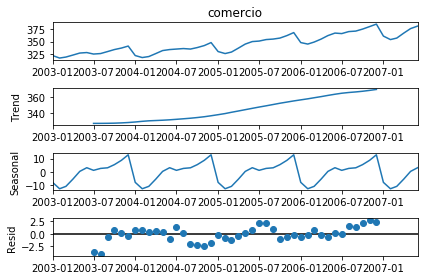

In [196]:
tsa.seasonal_decompose(train.comercio).plot()
result = tsa.stattools.adfuller(train.comercio)
plt.show()

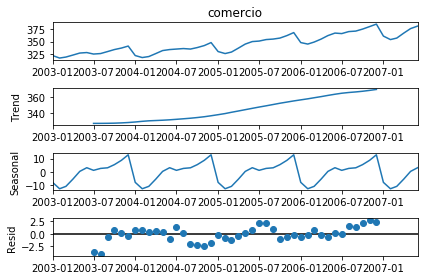

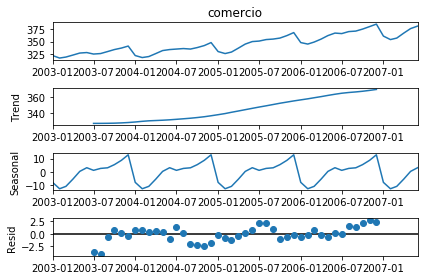

In [198]:
tsa.seasonal_decompose(train.comercio, model= 'additive').plot()

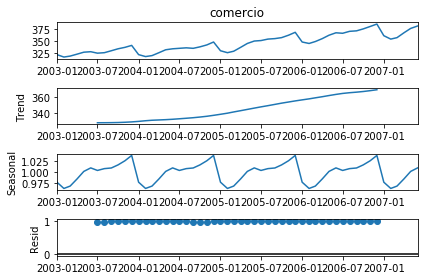

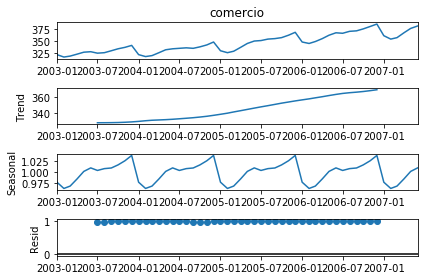

In [200]:
decomposition = tsa.seasonal_decompose(train.comercio, model= 'multiplicative')
#decomposition.observed, decomposition.trend, decomposition.sesonal, decomposition.resid
decomposition.plot()

In [ ]:
# modelo multiplicativo varia em amplitude e frequência no tempo

In [62]:
modfit = ExponentialSmoothing(np.asarray(train['comercio']), seasonal_periods= 12, trend='add', seasonal='add').fit()

c:\users\marce\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
c:\users\marce\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [63]:
test['comercio_Holt_Winter'] = modfit.forecast(len(test))

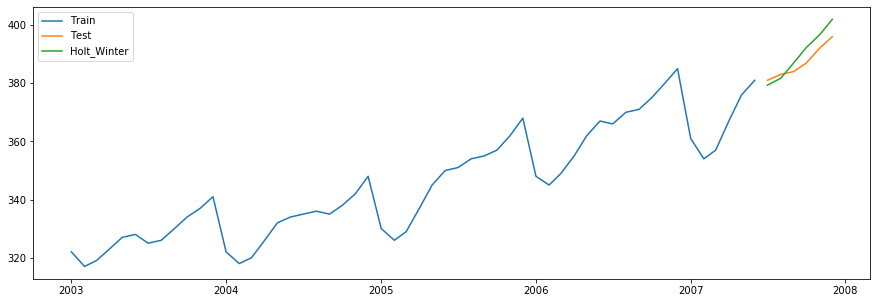

In [64]:
plt.figure(figsize=(15,5))
plt.plot(train.comercio, label= "Train")
plt.plot(test.comercio, label= 'Test')
plt.plot(test.comercio_Holt_Winter, label= 'Holt_Winter')
plt.legend(loc= 'best')
plt.show()

In [65]:
#from sklearn.metrics import mean_squared_error
#print(f'MSE= {mean_squared_error(test.comercio, test.comercio_Holt_Winter)}')

RMSE= 16.438652129454052


In [73]:
print(f'MSE= {tools.eval_measures.mse(test.comercio, test.comercio_Holt_Winter, axis=0)}')

MSE= 16.438652129454052


In [66]:
modfit.summary()

Dep. Variable:,endog,No. Observations:,54
Model:,ExponentialSmoothing,SSE,274.534
Optimized:,True,AIC,119.809
Trend:,Additive,BIC,151.633
Seasonal:,Additive,AICC,139.352
Seasonal Periods:,12,Date:,"Sun, 12 Apr 2020"
Box-Cox:,False,Time:,10:50:24
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9999000,alpha,True
smoothing_slope,0.0526316,beta,True


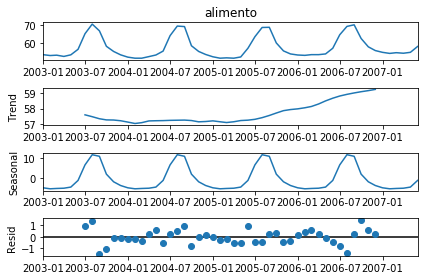

In [74]:
tsa.seasonal_decompose(train.alimento).plot()
result = tsa.stattools.adfuller(train.alimento)
plt.show()

In [75]:
modfit = ExponentialSmoothing(np.asarray(train['alimento']), seasonal_periods= 12, trend='add', seasonal='add').fit()

c:\users\marce\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
c:\users\marce\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
c:\users\marce\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [76]:
test['alimento_Holt_Winter'] = modfit.forecast(len(test))

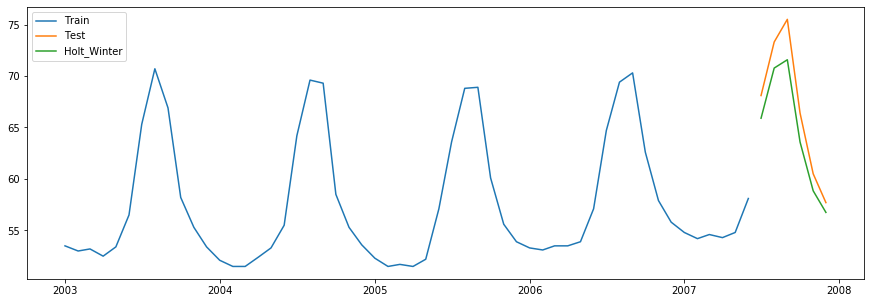

In [77]:
plt.figure(figsize=(15,5))
plt.plot(train.alimento, label= "Train")
plt.plot(test.alimento, label= 'Test')
plt.plot(test.alimento_Holt_Winter, label= 'Holt_Winter')
plt.legend(loc= 'best')
plt.show()

In [19]:
#print(f'RMSE= {mean_squared_error(test.alimento, test.alimento_Holt_Winter)}')

RMSE= 6.36793533508784


In [78]:
print(f'MSE= {tools.eval_measures.mse(test.alimento, test.alimento_Holt_Winter, axis=0)}')

MSE= 6.36793533508784


In [79]:
modfit.summary()

Dep. Variable:,endog,No. Observations:,54
Model:,ExponentialSmoothing,SSE,42.228
Optimized:,True,AIC,18.722
Trend:,Additive,BIC,50.546
Seasonal:,Additive,AICC,38.265
Seasonal Periods:,12,Date:,"Sun, 12 Apr 2020"
Box-Cox:,False,Time:,11:29:40
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1052632,alpha,True
smoothing_slope,0.1052632,beta,True


## SARIMAX - Seasonal ARIMA
#### order=(p, d, q), the dependent variable and any independent variables are differenced d times and
- 1/p lags of autocorrelations
- 1/q lags of moving averages
#### seasonal_order= (P, D, Q, s) multiplicative seasonal componentes. Variables are lag s, seasonally differenced D times and
- 1/P seasonal lags of autoregressive terms - valores significativos de plot_pacf
- 1/Q seasonal lags of moving-average terms - valores significativos de plot_acf

In [21]:
modfit = tsa.statespace.SARIMAX(train.comercio, order=(1, 0, 0), seasonal_order= (1,1,1,12)).fit()

c:\users\marce\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\marce\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [22]:
test['comercio_SARIMAX'] = modfit.forecast(len(test))

In [23]:
print(f'RMSE= {mean_squared_error(test.comercio, test.comercio_SARIMAX)}')

RMSE= 0.9984818202270639


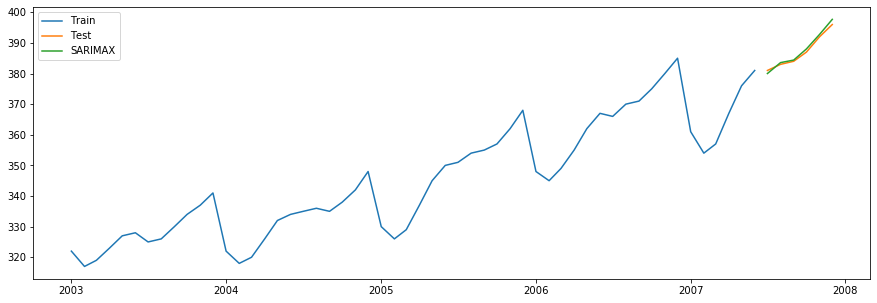

In [24]:
plt.figure(figsize=(15,5))
plt.plot(train.comercio, label= "Train")
plt.plot(test.comercio, label= 'Test')
plt.plot(test.comercio_SARIMAX, label= 'SARIMAX')
plt.legend(loc= 'best')
plt.show()

In [25]:
modfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             comercio   No. Observations:                   54
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood                 -89.520
Date:                              Sat, 11 Apr 2020   AIC                            187.039
Time:                                      19:31:00   BIC                            193.990
Sample:                                  01-01-2003   HQIC                           189.587
                                       - 06-01-2007                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9898      0.021     46.878      0.000       0.948       1.031
ar.S.L12       0.2920      1.748      0.167      0.867      -3.134       3.718
ma.S.L12      -0.4311      1.787     -0.241      0.809      -3.933       3.071
sigma2         3.7945      0.840      4.517      0.000       2.148       5.441
===================================================================================
Ljung-Box (Q):                       54.11   Jarque-Bera (JB):                 6.46
Prob(Q):                              0.07   Prob(JB):                         0.04
Heteroskedasticity (H):               1.07   Skew:                            -0.81
Prob(H) (two-sided):                  0.90   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
test

,mes,comercio,alimento,comercio_Holt_Winter,alimento_Holt_Winter,comercio_SARIMAX
mes,,,,,,
2007-07-01,2007-07-01,381,68.1,379.326622,65.896775,380.002357
2007-08-01,2007-08-01,383,73.3,381.652923,70.768043,383.568094
2007-09-01,2007-09-01,384,75.5,386.978152,71.576397,384.394849
2007-10-01,2007-10-01,387,66.4,392.305866,63.587903,388.027124
2007-11-01,2007-11-01,392,60.5,396.633534,58.846204,392.772154
2007-12-01,2007-12-01,396,57.7,401.960358,56.748682,397.692855


### Alimento Sarimax

In [181]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

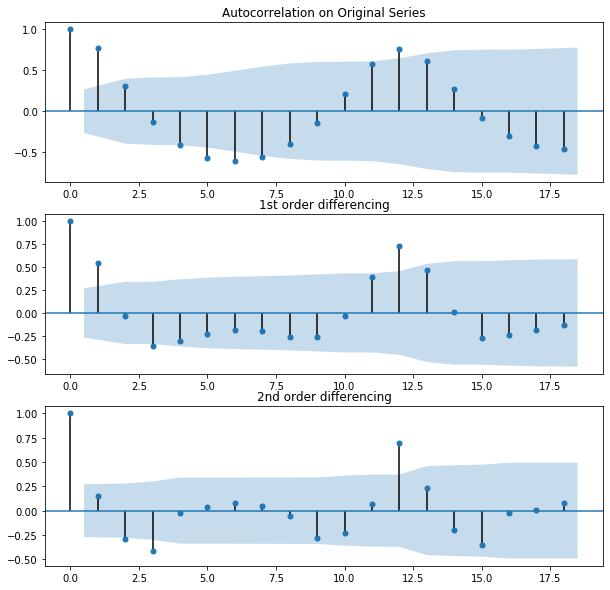

In [187]:
# order of differencing, d, using auto correlation
fig = plt.figure(figsize=(10,10))
ax1= fig.add_subplot(311)
fig= plot_acf(train.alimento, ax= ax1, title= 'Autocorrelation on Original Series')   # series.squeeze()
ax2= fig.add_subplot(312)
fig= plot_acf(train.alimento.diff().dropna(), ax= ax2, title= '1st order differencing')
ax3= fig.add_subplot(313)
fig= plot_acf(train.alimento.diff().diff().dropna(), ax= ax3, title= '2nd order differencing')
#plt.show()

##### aproxima-se  de uma série estacionária com a 1st diferenciação (d = 1)
#### para d = 1, 1st lag significativo, q = 1 (moving avarages)

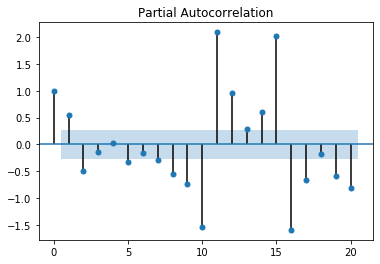

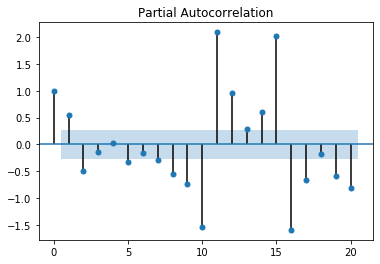

In [185]:
# order of AR, p, using partial autocorrelation  # d obtido na celula acima
plot_pacf(train.alimento.diff().dropna(), lags= 20)

In [173]:
modfit = tsa.statespace.SARIMAX(train.alimento, order=(1, 1, 1), seasonal_order= (0,1,0,12)).fit()
# order(p, d, q) #  1/p autocorrelations lags  #  1/q moving avareges lags

c:\users\marce\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\marce\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [174]:
test['alimento_SARIMAX'] = modfit.forecast(len(test))

In [175]:
print(f'MSE= {tools.eval_measures.mse(test.alimento, test.alimento_SARIMAX, axis=0)}')

MSE= 6.5758925177906695


In [176]:
modfit.aic

116.30013758346955

In [177]:
modfit.bic

121.44085378358247

In [178]:
modfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                            alimento   No. Observations:                   54
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                 -55.150
Date:                             Sun, 12 Apr 2020   AIC                            116.300
Time:                                     15:45:22   BIC                            121.441
Sample:                                 01-01-2003   HQIC                           118.172
                                      - 06-01-2007                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1867      0.352      0.531      0.595      -0.503       0.876
ma.L1         -0.7656      0.231     -3.313      0.001      -1.218      -0.313
sigma2         0.8500      0.123      6.883      0.000       0.608       1.092
===================================================================================
Ljung-Box (Q):                       23.50   Jarque-Bera (JB):                21.56
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                             1.29
Prob(H) (two-sided):                  0.10   Kurtosis:                         5.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [122]:
#import statsmodels.api as sm

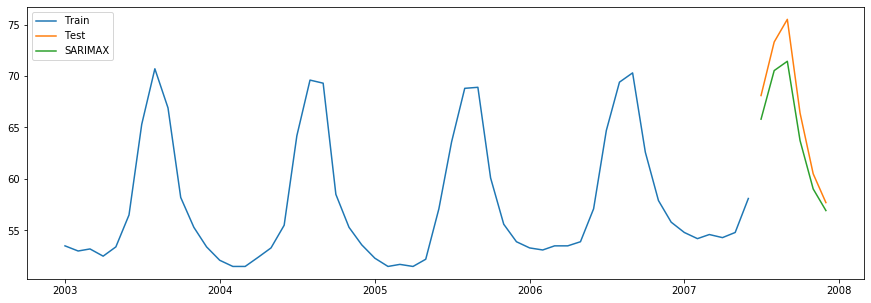

In [179]:
plt.figure(figsize=(15,5))
plt.plot(train.alimento, label= "Train")
plt.plot(test.alimento, label= 'Test')
plt.plot(test.alimento_SARIMAX, label= 'SARIMAX')
plt.legend(loc= 'best')
plt.show()

## Py auto.arima - pmdarima
<https://github.com/alkaline-ml/pmdarima>

In [190]:
model = pm.auto_arima(train.alimento, start_p=1, start_q=1, test='adf', seasonal= True, m= 12)

c:\users\marce\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\users\marce\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\marce\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\users\marce\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Convergenc

In [193]:
pred = model.predict(test.shape[0])

In [194]:
test['alimento_auto_ARIMA'] = pred

In [195]:
print(f'RMSE= {mean_squared_error(test.alimento, test.alimento_auto_ARIMA)}')

RMSE= 12.612129188123605


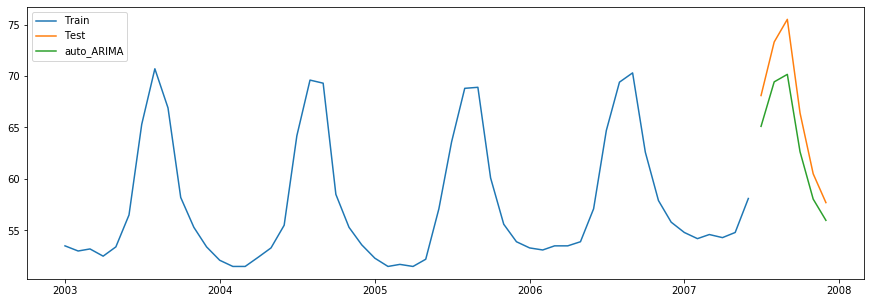

In [56]:
plt.figure(figsize=(15,5))
plt.plot(train.alimento, label= "Train")
plt.plot(test.alimento, label= 'Test')
plt.plot(test.alimento_auto_ARIMA, label= 'auto_ARIMA')
plt.legend(loc= 'best')
plt.show()

In [191]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   54
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                 -91.521
Date:                            Mon, 13 Apr 2020   AIC                            191.042
Time:                                    22:10:59   BIC                            198.998
Sample:                                         0   HQIC                           194.110
                                             - 54                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7150      0.437      1.634      0.102      -0.143       1.572
ar.L1          0.6553      0.127      5.161      0.000       0.406       0.904
ar.S.L12       0.9647      0.015     62.632      0.000       0.934       0.995
sigma2         0.9647      0.188      5.145      0.000       0.597       1.332
===================================================================================
Ljung-Box (Q):                       35.18   Jarque-Bera (JB):                 8.24
Prob(Q):                              0.69   Prob(JB):                         0.02
Heteroskedasticity (H):               0.51   Skew:                             0.87
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""